In [161]:
import numpy as np
import scipy as sp
import numpy.linalg as npl
import scipy.linalg as spl
import SolveTriangular
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi

## Esercizio A

Data la matrice

$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss facendo uso della funzione scipy.linalg.lu e sfruttarla per il calcolo del suo determinante e della sua inversa.


In [162]:
A = np.array([[4.5, 1, 3, 2], [1, -8, 2, 1], [-1, -2, -3, -1], [2, 6, 0, 1]])
n = A.shape[0]

PT, L, U = spl.lu(A)
P = PT.T.copy()

In [163]:
"""
Per calcolare l'inversa è necessario risolvere
n sistemi lineari dove il termine noto è l'i-esimo
vettore riga della base canonica (A*A^-1=I)

L @ yi = P @ ei
U @ xi = yi

con ei l'i-esima riga della matrice identità e xi l'
i-esima colonna nella matrice inversa
"""
I = np.identity(n)
A_inv = np.zeros_like(A)

for i in range(n):
    ei = I[i]
    yi, flag = SolveTriangular.Lsolve(L, P @ ei)
    xi, flag = SolveTriangular.Usolve(U, yi)
    A_inv[:, i] = xi.reshape(n,)

print("A^-1:", A_inv)

A^-1: [[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]


In [164]:
"""
Per calcolare il determinante tramite fattorizzazione
PA = LU, si ha che

det(PA) = det(LU) = det(L) * det(U) = det(U) = prod(U[i][i])
det(P) = (-1)^s
det(A) = (-1)^s * prod(U[i][i])

dove s è il numero di scambi effettuati, il det(L) = 1 perché
tutti gli elementi diagonali di L sono 1
"""
det_U = np.diag(U).prod()
det_A = npl.det(P) * det_U
print("Determinante di A:", det_A)

Determinante di A: 58.00000000000002


## Esercizio B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con

$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$

Scrivere lo script Python in cui

- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti; [**punti 2**]

- si sfrutti la decomposizione QR della matrice A per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$ e si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$; [**punti 5**]

- dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]

**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


> in questo caso, x e y rappresentano i coefficenti di a1 e a2, e (x^2 + y^2) il termine noto, mentre il coefficente di a3 è 1

In [165]:
x = np.array([0, 4, 0, 5])
y = np.array([0, 0, 4, 6])

# matrice dei coefficenti di a1, a2, a3
A = np.column_stack((x, y, np.full_like(x, 1)))
b = -(x**2 + y**2)

In [166]:
def qrLS(A,b):
	#Risolve un sistema sovradeterminato con il metodo QR-LS
    n = A.shape[1]  # numero di colonne di A
    Q,R = spl.qr(A)
    h = Q.T @ b
    x,flag=SolveTriangular.Usolve(R[:n,:n], h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [167]:
a_star, residuo = qrLS(A, b)
a_star

array([[-5.61904762],
       [-5.75396825],
       [ 3.77777778]])

(-1.0628147601487108,
 6.681879786083004,
 -0.9953679330226068,
 6.749336186990863)

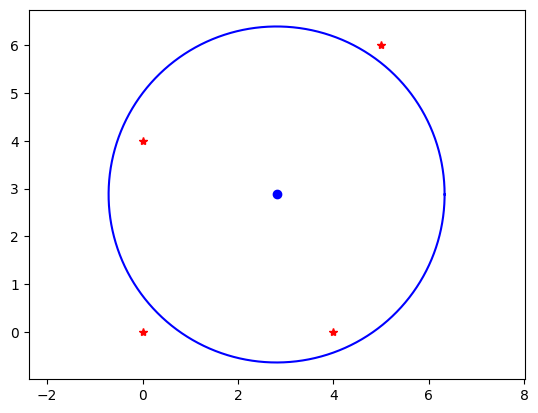

In [168]:
C = (-a_star[0]/2, -a_star[1]/2)
r = np.sqrt((a_star[0]**2)/4 + (a_star[1]**2)/4 - a_star[2])

t = np.linspace(0, 2*pi, 1000)
xx = C[0] + r * np.cos(t)
yy = C[1] + r * np.sin(t)

plt.plot(C[0], C[1], 'bo', x, y, 'r*', xx, yy, 'b-')
plt.axis("equal")

## Esercizio C

Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
  basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).


In [169]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013])
y = np.array([0.0007, 0.0162, 0.0288, 0.0309, 0.0310])
xx = np.linspace(0, 8, 100)

In [170]:
def eqnorm(A, b):
    # Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G = A.T @ A
    f = A.T @ b

    L = npl.cholesky(G)
    U = L.T

    z, flag = SolveTriangular.Lsolve(L, f)
    if flag != 0:
        raise "Failed to Lsolve"
    x, flag = SolveTriangular.Usolve(U, z)
    if flag != 0:
        raise "Failed to Usolve"

    return x

Residuo lineare: 0.00048483277623132274


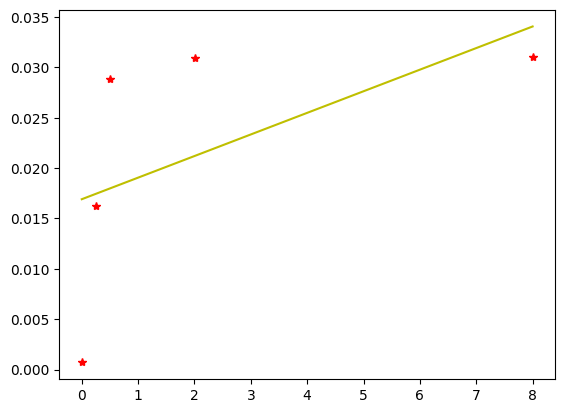

In [171]:
# y = a + bx
A1 = np.vander(x, 2, increasing=True)
alpha_l = eqnorm(A1, y)

y_l = np.polyval(np.flip(alpha_l), x)
residuo = np.sum((y_l - y) ** 2)
print("Residuo lineare:", residuo)

yy_l = np.polyval(np.flip(alpha_l), xx)
plt.plot(x, y, "r*", xx, yy_l, "y-")

Residuo quadratico: 0.00023646355940249854


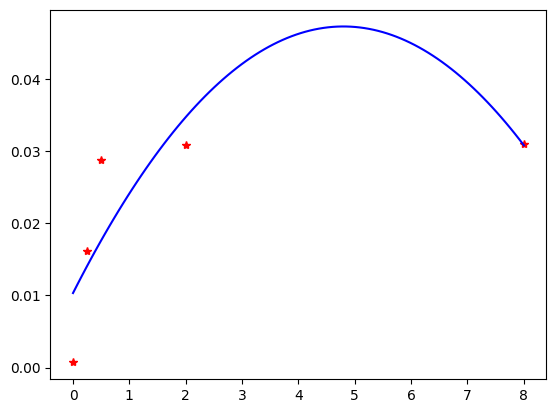

In [172]:
# y = a + bx + cx^2
A2 = np.vander(x, 3, increasing=True)
alpha_q = eqnorm(A2, y)
yy_q = np.polyval(np.flip(alpha_q), xx)

y_q = np.polyval(np.flip(alpha_q), x)
residuo = np.sum((y_q - y) ** 2)
print("Residuo quadratico:", residuo)

plt.plot(x, y, "r*", xx, yy_q, "b-")

Residuo esponenziale: 13.686210747673012


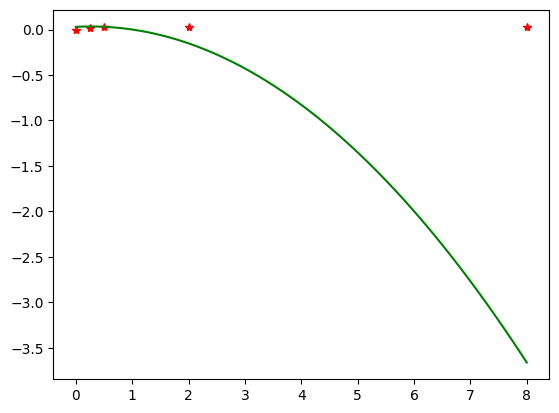

In [173]:
# y = a + be^-x + ce^-2x
A3 = np.column_stack((np.exp(np.zeros_like(x)), np.exp(-x), np.exp(-2 * x)))
alpha_e = eqnorm(A3, y)
yy_e = np.polyval(np.flip(alpha_e), xx)

y_e = np.polyval(np.flip(alpha_e), x)
residuo = np.sum((y_e - y) ** 2)
print("Residuo esponenziale:", residuo)

plt.plot(x, y, "r*", xx, yy_e, "g-")

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella

L [-55 -45 -35 -25 -15 -5 5 15 25 35 45 55 65]

T [3.7 3.7 3.52 3.27 3.2 3.15 3.15 3.25 3.47 3.52 3.65 3.67 3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate.
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.


In [174]:
k = 1.5
L = np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T = np.array(
    [3.7, 3.7, 3.52, 3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52]
)

In [175]:
def plagr(xnodi, j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[:j], xnodi[j + 1 :])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])

    p = num / den
    return p


def InterpL(x, y, xx):
    """ "
    %funzione che determina in un insieme di punti il valore del polinomio
    %interpolante ottenuto dalla formula di Lagrange.
    % DATI INPUT
    %  x  vettore con i nodi dell'interpolazione
    %  f  vettore con i valori dei nodi
    %  xx vettore con i punti in cui si vuole calcolare il polinomio
    % DATI OUTPUT
    %  y vettore contenente i valori assunti dal polinomio interpolante
    %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

In [176]:
L_londra = np.array([51])
T_londra = InterpL(L, T, L_londra)
print("T Londra:", T_londra)

T Londra: [3.87299913]


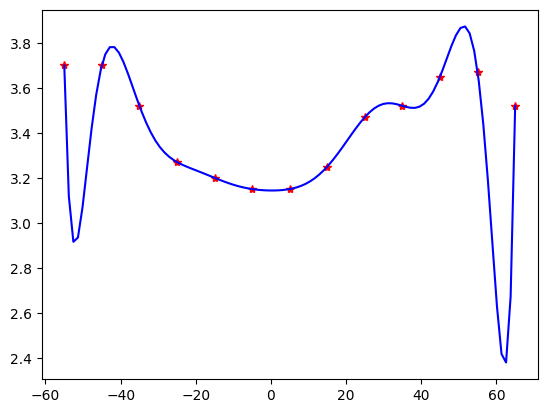

In [177]:
xx = np.linspace(np.min(L), np.max(L), 100)
yy = InterpL(L, T, xx)
plt.plot(L, T, "r*", xx, yy, "b-")

> Sono presenti grandi oscillazioni agli estremi dell'intervallo, caratteristica tipica della valutazione del polinomio in punti equidistanti e di un grado elevato del polinomio di interpolazione, per prevenire questo fenomeno sarebbe meglio utilizzare come punti di valutazioni gli zeri della funzione di chebichev


## Esercizio E

- Implementare il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
x_1+3x_0x_1^2=57
\end{array}
\right].
$$

con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

**Nota Bene**: Servirsi del metodo grafico per individuare un
iterato iniziale $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]


In [178]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):
    """
    Funzione per la risoluzione del sistema F(x)=0
    mediante il metodo di Newton.

    Parametri
    ----------
    fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
    jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
    x0 : array
      Vettore contenente l'approssimazione iniziale della soluzione.
    tolx : float
      Parametro di tolleranza per l'errore assoluto.
    tolf : float
      Parametro di tolleranza per l'errore relativo.
    nmax : int
      Numero massimo di iterazioni.

    Restituisce
    -------
    x : array
      Vettore soluzione del sistema (o equazione) non lineare.
    it : int
      Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
    Xm : array
      Vettore contenente la norma dell'errore relativo tra due iterati successivi.
    """

    matjac = jac(x0)
    if npl.det(matjac) == 0:
        print(
            "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
        )
        return None, None, None

    s = npl.solve(matjac, -fun(x0))
    # Aggiornamento della soluzione
    it = 1
    x1 = x0 + s
    fx1 = fun(x1)

    Xm = [np.linalg.norm(s, 1) / np.linalg.norm(x1, 1)]

    while it < nmax and Xm[it - 1] >= tolx and npl.norm(fx1) >= tolf:
        x0 = x1
        it += 1

        matjac = jac(x0)
        if npl.det(matjac) == 0:
            print(
                "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
            )
            return None, None, None

        s = npl.solve(matjac, -fun(x0))

        # Aggiornamento della soluzione
        x1 = x0 + s
        fx1 = fun(x1)
        Xm.append(np.linalg.norm(s, 1) / np.linalg.norm(x1, 1))

    return x1, it, Xm

In [179]:
def my_newtonSys_corde(fun, jac, x0, tolx, tolf, nmax):
    """
     Funzione per la risoluzione del sistema f(x)=0
     mediante il metodo di Newton, con variante delle corde, in cui lo Jacobiano non viene calcolato
     ad ogni iterazione, ma rimane fisso, calcolato nell'iterato iniziale x0.

    Parametri
     ----------
     fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
     jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
     x0 : array
       Vettore contenente l'approssimazione iniziale della soluzione.
     tolx : float
       Parametro di tolleranza per l'errore tra due soluzioni successive.
     tolf : float
       Parametro di tolleranza sul valore della funzione.
     nmax : int
       Numero massimo di iterazioni.

     Restituisce
     -------
     x : array
       Vettore soluzione del sistema (o equazione) non lineare.
     it : int
       Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
     Xm : array
         Vettore contenente la norma dell'errore relativo tra due iterati successivi.
    """

    matjac = jac(x0)
    if npl.det(matjac) == 0:
        print(
            "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
        )
        return None, None, None
    s = npl.solve(matjac, -fun(x0))
    # Aggiornamento della soluzione
    it = 1
    x1 = x0 + s
    fx1 = fun(x1)

    Xm = [np.linalg.norm(s, 1) / np.linalg.norm(x1, 1)]

    while it < nmax and Xm[it - 1] >= tolx and npl.norm(fx1) >= tolf:
        x0 = x1
        it += 1

        s = npl.solve(matjac, -fun(x0))

        # Aggiornamento della soluzione
        x1 = x0 + s
        fx1 = fun(x1)
        Xm.append(np.linalg.norm(s, 1) / np.linalg.norm(x1, 1))

    return x1, it, Xm

In [180]:
def my_newtonSys_sham(fun, jac, x0, tolx, tolf, nmax):
    """
    Funzione per la risoluzione del sistema f(x)=0
    mediante il metodo di Newton, con variante delle shamanski, in cui lo Jacobiano viene
    aggiornato ogni un tot di iterazioni, deciso dall'utente.

    Parametri
    ----------
    fun : funzione vettoriale contenente ciascuna equazione non lineare del sistema.
    jac : funzione che calcola la matrice Jacobiana della funzione vettoriale.
    x0 : array
            Vettore contenente l'approssimazione iniziale della soluzione.
    tolx : float
            Parametro di tolleranza per l'errore tra due soluzioni successive.
    tolf : float
            Parametro di tolleranza sul valore della funzione.
    nmax : int
            Numero massimo di iterazioni.

    Restituisce
    -------
    x : array
            Vettore soluzione del sistema (o equazione) non lineare.
    it : int
            Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
    Xm : array
                    Vettore contenente la norma dell'errore relativo tra due iterati successivi.
    """

    matjac = jac(x0)
    if npl.det(matjac) == 0:
        print(
            "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
        )
        return None, None, None

    s = npl.solve(matjac, -fun(x0))
    # Aggiornamento della soluzione
    it = 1
    x1 = x0 + s
    fx1 = fun(x1)

    Xm = [np.linalg.norm(s, 1) / np.linalg.norm(x1, 1)]
    update = 10  # Numero di iterazioni durante le quali non si aggiorna la valutazione dello Jacobiano nell'iterato attuale

    while it < nmax and Xm[it - 1] >= tolx and npl.norm(fx1) >= tolf:
        x0 = x1
        it += 1

        if (
            it % update == 0
        ):  # Valuto la matrice di iterazione nel nuovo iterato ogni "update" iterazioni
            matjac = jac(x0)
            if npl.det(matjac) == 0:
                print(
                    "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
                )
                return None, None, None
            else:
                s = npl.solve(matjac, -fun(x0))
        else:
            s = npl.solve(matjac, -fun(x0))

        # Aggiornamento della soluzione
        x1 = x0 + s
        fx1 = fun(x1)
        Xm.append(np.linalg.norm(s, 1) / np.linalg.norm(x1, 1))

    return x1, it, Xm

In [181]:
f = lambda x: np.array([x[0] ** 2 + x[0] * x[1] - 10, x[1] + 3 * x[0] * x[1] ** 2 - 57])
jac = lambda x: np.array([
    [2*x[0] + x[1], x[0]],
    [3*x[1]**2, 6*x[0]*x[1]]
])

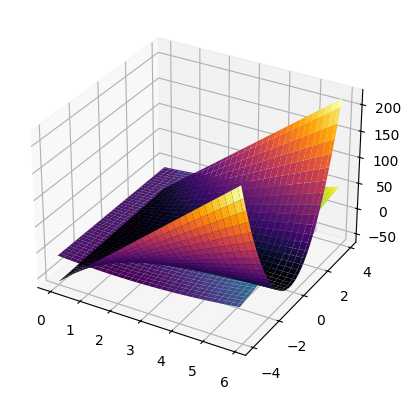

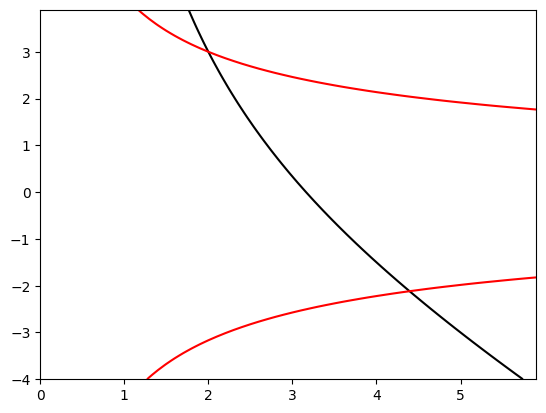

In [182]:
x = np.arange(0, 6, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
Z1 = Z[0]
Z2 = Z[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z1, cmap=plt.cm.viridis)
ax.plot_surface(X, Y, Z2, cmap=plt.cm.inferno)
plt.show()

#Per disegnare le curve di livello corrispondente a z=0
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')


In [183]:
x0 = np.array([2, 4])
tolx = 1e-12
tolf = 1e-12
nmax = 400

Metodo di newton f(x): [ 0.00000000e+00 -2.55795385e-13]


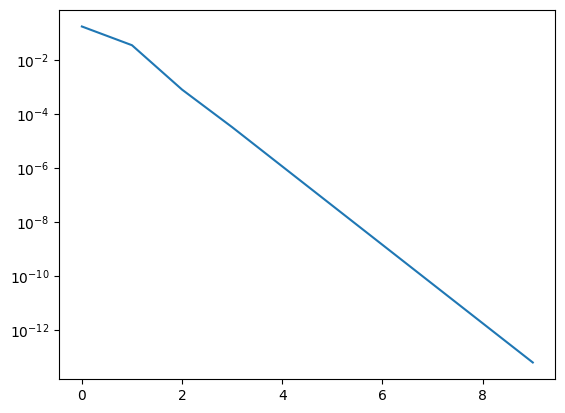

In [184]:
x_newton, it_newton, err_newton = my_newtonSys(f, jac, x0, tolx, tolf, nmax)
print("Metodo di newton f(x):", f(x_newton))
plt.semilogy(range(it_newton), err_newton)

Metodo di corde f(x): [-3.14415161e-13 -1.72875048e-11]


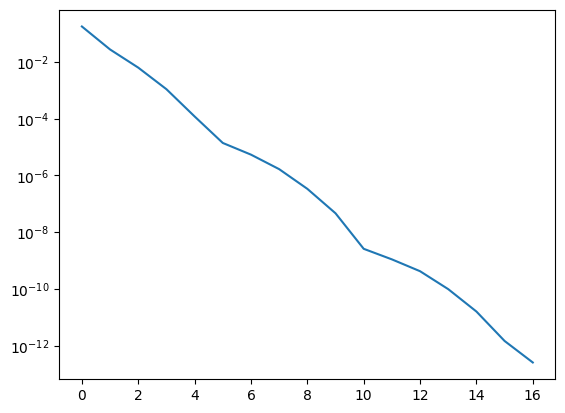

In [185]:
x_corde, it_corde, err_corde = my_newtonSys_corde(f, jac, x0, tolx, tolf, nmax)
print("Metodo di corde f(x):", f(x_corde))
plt.semilogy(range(it_corde), err_corde)

Metodo di shamanski f(x): [0.00000000e+00 1.84741111e-13]


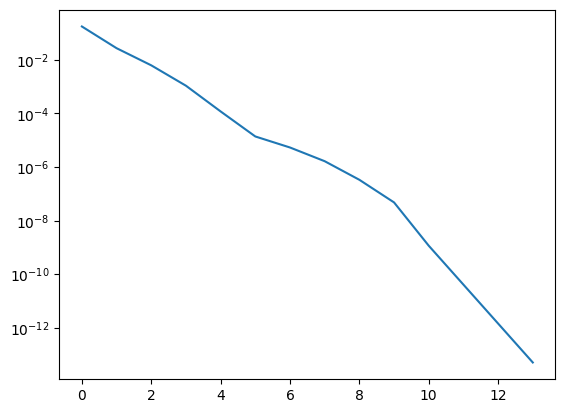

In [186]:
x_sham, it_sham, err_sham = my_newtonSys_sham(f, jac, x0, tolx, tolf, nmax)
print("Metodo di shamanski f(x):", f(x_sham))
plt.semilogy(range(it_sham), err_sham)